In [47]:

import matplotlib as plt
import json
import pandas as pd
from collections import Counter
from Module.ES_connector import ElasticsearchQuery

In [27]:
import requests
import json

# 定義 Elasticsearch 的 URL 和索引
url = "http://192.168.31.130:32327/game_data_aaa/_search"

# 查詢請求的主體
query = {
  "size" : 752,
  "query": {
    "match_all": {}
  }
}

# 發送請求到 Elasticsearch
response = requests.get(url, headers={"Content-Type": "application/json"}, data=json.dumps(query))

# 檢查回應狀態碼並顯示結果
if response.status_code == 200:
    result = response.json()
    
     # 以漂亮格式顯示 JSON 結果
else:
    print(f"Error: {response.status_code}")


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x78c04772fbe0>>
Traceback (most recent call last):
  File "/usr/local/pyenv/versions/3.10.15/envs/dev310-da/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [52]:
# 定義 Elasticsearch 伺服器和索引
es_host = 'http://192.168.31.130:32327'
index_name = 'game_data_aaa'
    
    # 初始化 ElasticsearchQuery 類
es_query = ElasticsearchQuery(es_host, index_name)
    
    # 定義查詢的 query
query = {
    "query": {
        "match_all": {}
        }
    }
    
    # 獲取資料庫大小並進行查詢
result = es_query.search_with_size(query)
    
    # 顯示查詢結果
# if search_result:
#     print(search_result[751])

In [ ]:
def tags_count_by_year(game_rawdata, target):
    """
    Calculate the yearly count of each tag for games and return a pivot table.

    Parameters:
    game_rawdata : list
        A list of dictionaries containing game data, including release dates and tags.
    target : str
        The key in each game dictionary representing the tags to be counted (e.g., 'genres' or 'tags').

    Returns:
    pivot_df : DataFrame
        A pivot table with years as rows and tags as columns, showing the count of each tag per year.
    """
    games_data = []
    for i in range(len(game_rawdata)):
        game_obj = game_rawdata[i]
        tags = game_obj[target]
        if game_obj["releaseDate"]:
            year = pd.to_datetime(game_obj["releaseDate"], unit='ms').year
        for tag in tags:
            games_data.append({'year': year, target: tag})
    df = pd.DataFrame(games_data)
    df = df.groupby(['year', target]).size().reset_index(name='count')
    pivot_df = df.pivot_table(index='year', columns=target, values='count', fill_value=0)
    return pivot_df

In [ ]:
import matplotlib.pyplot as plt
"""
Create a canvas with subplots and plot tag rankings by year.

Functions:
- create_plot_frame(num_plots): Sets up a figure with the specified number of subplots.
- plot_single_tag_rank(ax, target, year, df_target): Plots a horizontal bar chart of tag rankings for a specific year on the given subplot axis.

Parameters:
- num_plots : int
    Number of subplots to create in the figure.
- ax : matplotlib.axes.Axes
    The axis on which to draw the horizontal bar chart.
- target : str
    The tag or genre to plot.
- year : int
    The year for which to display the tag ranking.
- df_target : DataFrame
    DataFrame containing the tag counts by year, with years as rows and tags as columns.

Returns:
- fig : Figure
    The matplotlib figure object containing the subplots.
- axes : ndarray
    An array of subplot axes for further customization.
"""
# 創建一個畫布和子圖的框架，並設置子圖的數量
def create_plot_frame(num_plots):
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 6))  # 1 行 num_plots 列的子圖
    return fig, axes

# 繪製一張子圖的函數，依次放入不同的子圖框架中
def plot_single_tag_rank(ax, target, year, df_target):
    df_target = df_target.drop(columns=['Early Access','Indie','Free To Play'])
    year_series = df_target.loc[year].sort_values()

    # 繪製水平長條圖到指定的子圖軸 ax
    ax.barh(year_series.index, year_series.values, color='skyblue')

    # 添加子圖的標題和標籤
    ax.set_title(f'{target.capitalize()} in {year}', fontsize=16)
    ax.set_xlabel('Number of Games', fontsize=12)
    ax.set_ylabel(f'{target.capitalize()}', fontsize=12)

# 設置畫布，假設我們想畫5個年份的圖




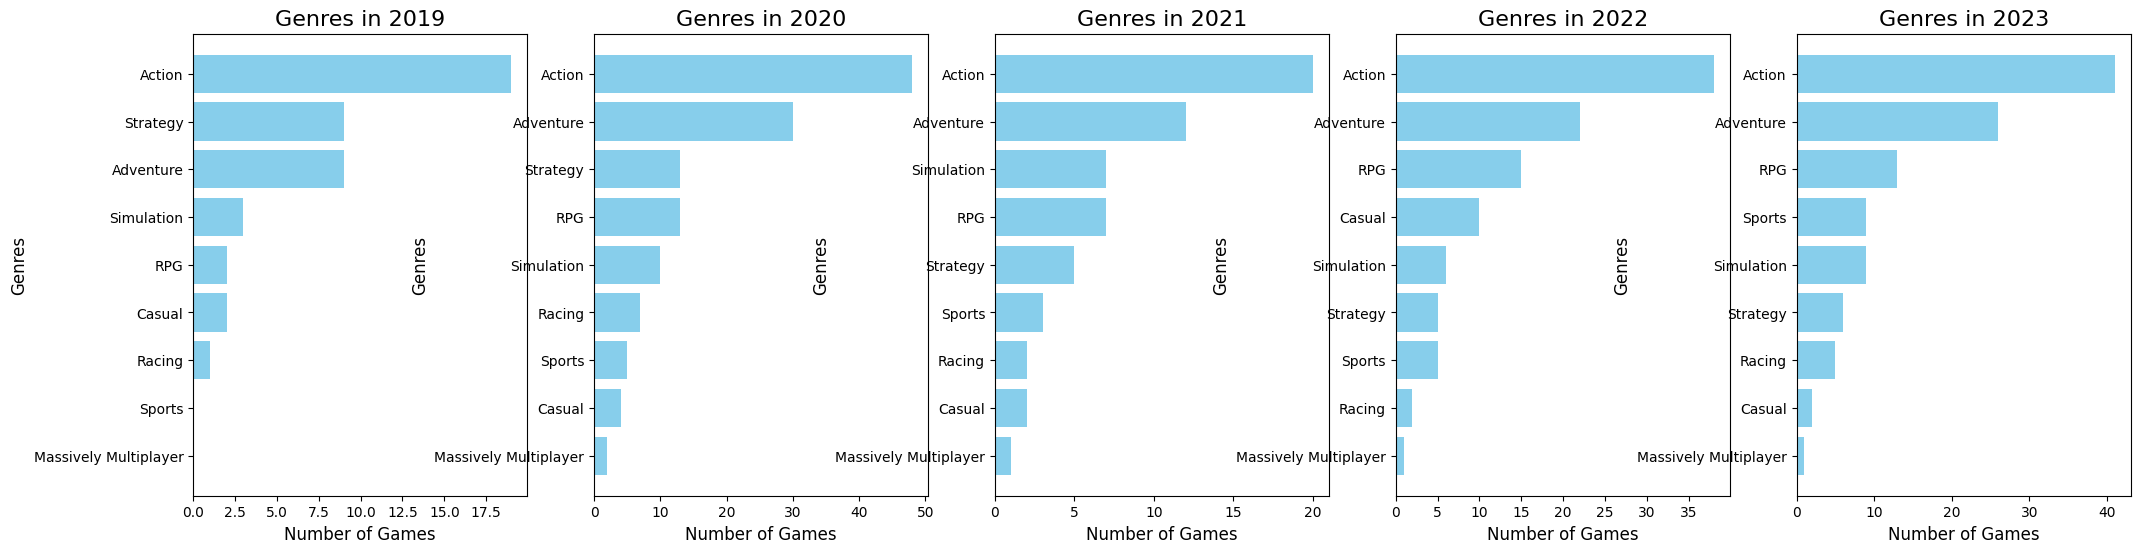

In [55]:
# 分別呼叫函數來繪製每一個子圖
df_aaa=tags_count_by_year(result, "genres")
fig, axes = create_plot_frame(5)
plot_single_tag_rank(axes[0], "genres", 2019, df_aaa)
plot_single_tag_rank(axes[1], "genres", 2020, df_aaa)
plot_single_tag_rank(axes[2], "genres", 2021, df_aaa)
plot_single_tag_rank(axes[3], "genres", 2022, df_aaa)
plot_single_tag_rank(axes[4], "genres", 2023, df_aaa)

In [ ]:
# Connect to ES cloud and plot Genres racing bar
es_host_cloud = 'https://e32aaa94f81549368f75827f1e5da659.us-central1.gcp.cloud.es.io/'
api_key = ("g1i_hJIBR8AYR_FZHqsZ", "NgU5E6CkSJmd1t8uuljJJA") 
index_name_aa = 'game_data_aa'
es_query_aa = ElasticsearchQuery(es_host, index_name_aa)
result_aa = es_query_aa.search_with_size(query)

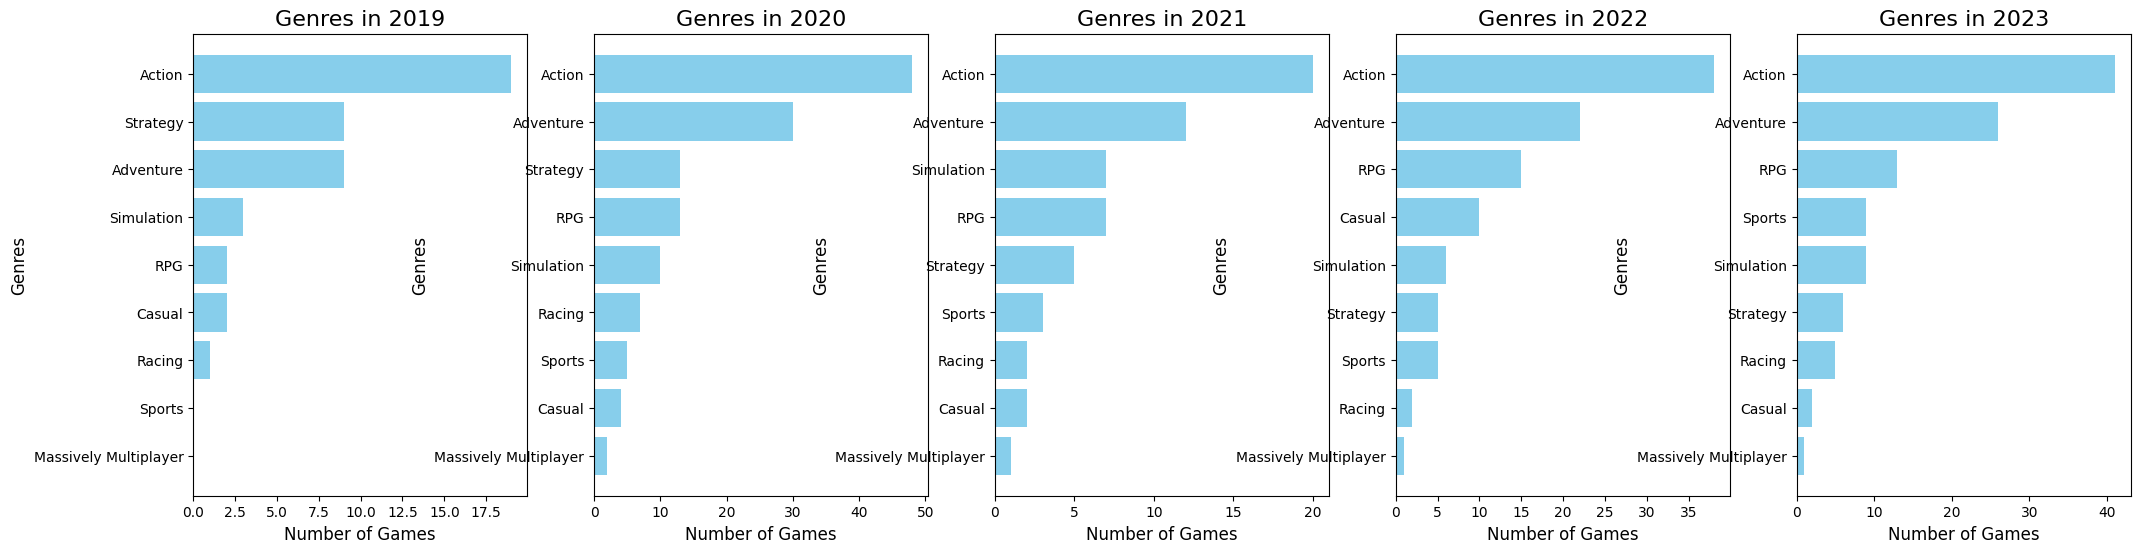

In [34]:
df_aa=tags_count_by_year(result_aa, "genres")
fig, axes = create_plot_frame(5)
plot_single_tag_rank(axes[0], "genres", 2019, df_aa)
plot_single_tag_rank(axes[1], "genres", 2020, df_aa)
plot_single_tag_rank(axes[2], "genres", 2021, df_aa)
plot_single_tag_rank(axes[3], "genres", 2022, df_aa)
plot_single_tag_rank(axes[4], "genres", 2023, df_aa)